In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
phone_df = pd.read_csv('data/Phone Complaints.csv')
phone_df.head()

,Issue Occurred,Form,Method,Issue,City,State,Zip
0,2014-10-31 12:29:24,Phone,Wireless (cell phone/other mobile device),Cramming (unauthorized charges on your phone b...,Minnetonka,MN,55345
1,2014-10-31 07:03:00,Phone,Internet (VOIP),Telemarketing (including do not call and spoof...,Berwick,PA,18603
2,2014-10-31 00:36:00,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,Johnstown,PA,15902
3,2014-10-31 13:34:38,Phone,Wireless (cell phone/other mobile device),Availability (including rural call completion),Oconomowoc,WI,53066
4,2014-10-31 14:05:16,Phone,Internet (VOIP),Availability (including rural call completion),Somers,CT,06071


In [39]:
phone_df_new = phone_df[(phone_df['Issue Occurred'] >= '2015') & (phone_df['Issue Occurred'] < '2020')]
phone_df_new = phone_df_new[(phone_df_new != 'Unknown').all(axis=1)]
phone_df_new.head()

,Issue Occurred,Form,Method,Issue,City,State,Zip
5950,2015-09-01 13:00:00,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,Fallbrook,CA,92028
11148,2015-12-12 10:20:00,Phone,Wireless (cell phone/other mobile device),Robocalls,Oakland,CA,94619
12523,2015-12-16 11:15:00,Phone,Wireless (cell phone/other mobile device),Robocalls,Portland,OR,97213
14243,2015-12-14 15:14:00,Phone,Wired,Telemarketing (including do not call and spoof...,Test,AL,11111
18099,2015-01-01 00:00:20,Phone,Wired,Interference (including signal jammers),Yonkers,NY,10710


## Before anything, a simple prediction with Linear Regression...

In [41]:
method_df = phone_df_new[['Issue Occurred', 'Method']]
method_df['Issue Year'] = pd.to_datetime(method_df['Issue Occurred'], format='%Y-%m-%d %H:%M:%S').dt.year.astype('int64')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
method_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175267 entries, 5950 to 1274702
Data columns (total 3 columns):
Issue Occurred    1175267 non-null object
Method            1175267 non-null object
Issue Year        1175267 non-null int64
dtypes: int64(1), object(2)
memory usage: 35.9+ MB


In [43]:
method_df_new = method_df[['Issue Year', 'Method']]
method_df_new = method_df_new.groupby(['Issue Year', 'Method']).size().reset_index().rename(columns={0:'count'})
method_df_new = method_df_new.pivot(index='Issue Year', columns='Method', values='count')
method_df_new

Method,Internet (VOIP),Wired,Wireless (cell phone/other mobile device)
Issue Year,,,
2015,19244,82157,121147
2016,16133,67460,125870
2017,16081,64093,156345
2018,19102,67025,190940
2019,40759,72159,116752


Text(0.5, 1.0, 'Method count per year from 2015 to 2019')

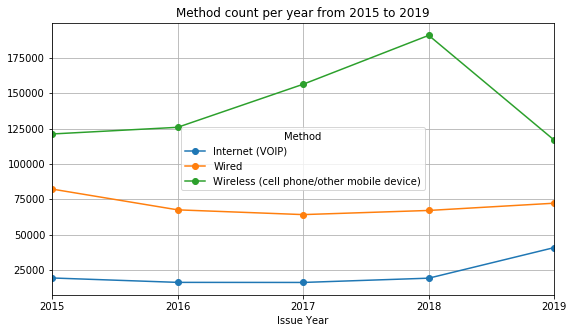

In [56]:
from sklearn.linear_model import LinearRegression

method_df_new.plot(y=method_df_new.columns, grid=True, xticks=method_df_new.index, marker='o', figsize=(9,5))
plt.title('Method count per year from 2015 to 2019')

In [62]:
x = method_df_new.index
Y = method_df_new.values.T

lin_model = LinearRegression()
lin_model.fit(x, Y)

ValueError: Expected 2D array, got 1D array instead:
array=[2015 2016 2017 2018 2019].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.